In [1]:
runs = 6
train_accs = []
test_accs = []
dev_accs = []

In [2]:
import numpy as np
import json
import matplotlib.pyplot as plt
for run in range(runs):
        res_file = f'results/language_parser/train_defaults_jump{run}.json'

        # with open(attn_file, 'rb') as f:
        #     attn_maps = pickle.load(f)

        with open(res_file, 'r') as f:
            stats = json.load(f)

        dev_accs.append(stats.get('dev_accs'))
        train_accs.append(stats.get('train_accs'))
        test_accs.append(stats.get('test_accs'))

In [3]:
train_accs = np.array(train_accs).T
test_accs = np.array(test_accs).T
dev_accs = np.array(dev_accs).T

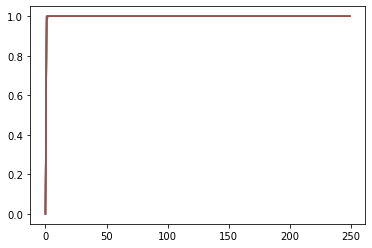

In [4]:
plt.plot(train_accs)

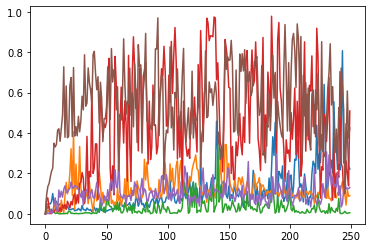

In [6]:
plt.plot(test_accs)

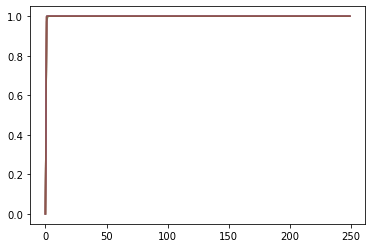

In [7]:
plt.plot(dev_accs)

Transformer Results

In [8]:
runs = 8
train_accs = []
test_accs = []
dev_accs = []

In [9]:
import numpy as np
import json
import matplotlib.pyplot as plt
for run in range(runs):
        res_file = f'results/transformer/train_defaults_jump{run}.json'

        # with open(attn_file, 'rb') as f:
        #     attn_maps = pickle.load(f)

        with open(res_file, 'r') as f:
            stats = json.load(f)

        dev_accs.append(stats.get('dev_accs'))
        train_accs.append(stats.get('train_accs'))
        test_accs.append(stats.get('test_accs'))

In [10]:
train_accs = np.array(train_accs).T
test_accs = np.array(test_accs).T
dev_accs = np.array(dev_accs).T

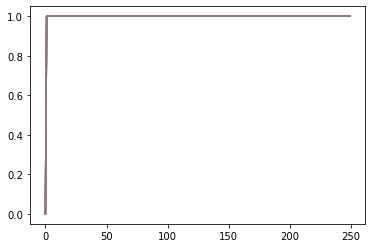

In [11]:
plt.plot(train_accs)

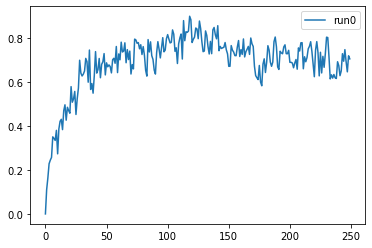

In [16]:
plt.plot(np.mean(test_accs, axis=1))
plt.legend(["run%d"%i for i in range(runs)])

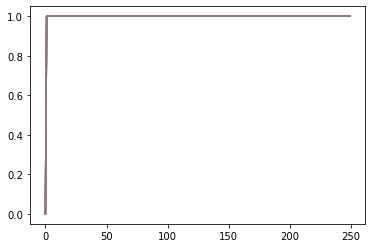

In [13]:
plt.plot(dev_accs)

In [18]:
runs = 1
train_accs = []
test_accs = []
dev_accs = []

In [19]:
import numpy as np
import json
import matplotlib.pyplot as plt
for run in range(runs):
        res_file = f'results/transformer/train_defaults_mcd1{run}.json'

        # with open(attn_file, 'rb') as f:
        #     attn_maps = pickle.load(f)

        with open(res_file, 'r') as f:
            stats = json.load(f)

        dev_accs.append(stats.get('dev_accs'))
        train_accs.append(stats.get('train_accs'))
        test_accs.append(stats.get('test_accs'))

In [20]:
train_accs = np.array(train_accs).T
test_accs = np.array(test_accs).T
dev_accs = np.array(dev_accs).T

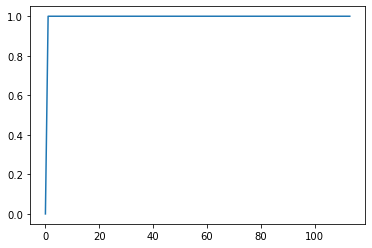

In [21]:
plt.plot(train_accs)

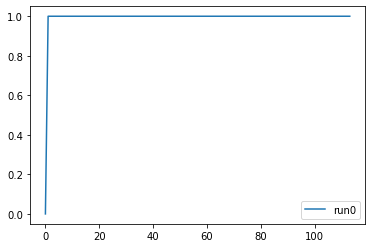

In [22]:
plt.plot(np.mean(test_accs, axis=1))
plt.legend(["run%d"%i for i in range(runs)])

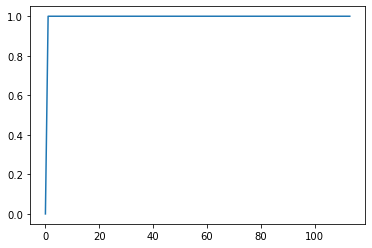

In [23]:
plt.plot(dev_accs)

In [1]:
from data import build_scan
SRC, TRG, train_data, dev_data, test_data = build_scan(split='addjump', batch_size=64, device='cpu')
src = []
trg = []
for i, batch in enumerate(test_data):
    src.append(batch.src.transpose(0, 1)[2])
    trg.append(batch.trg.transpose(0, 1)[2])
assert len(src) == len(trg)

s = src[-1]
source = '<sos> '
for i in range(1, s.shape[0]):
    sym = SRC.vocab.itos[s[i]]
    if sym == '<eos>': break
    source += sym + ' '
source += '<eos>'
ss = source.split()
print(source)

t = trg[-1]
target = '<sos> '
for i in range(1, t.shape[0]):
    sym = TRG.vocab.itos[t[i]]
    if sym == '<eos>': break
    target += sym + ' '
target += '<eos>'
tt = target.split()
print(target)

<sos> jump opposite left twice and look opposite left thrice <eos>
<sos> I_TURN_LEFT I_TURN_LEFT I_JUMP I_TURN_LEFT I_TURN_LEFT I_JUMP I_TURN_LEFT I_TURN_LEFT I_LOOK I_TURN_LEFT I_TURN_LEFT I_LOOK I_TURN_LEFT I_TURN_LEFT I_LOOK <eos>


Transformer Attention Visualizations

In [9]:
import torch
from models.models import Transformer
model = Transformer(
    src_vocab_size=17,
    trg_vocab_size=10,
    d_model=512,
    nhead=8,
    num_encoder_layers=6,
    num_decoder_layers=6,
    dim_feedforward=2048,
    dropout=0.1,
    pad_idx=1,
    device=torch.device('cpu')
)
device = torch.device('cpu')
model = torch.load('./weights/transformer/scan/defaults_addjump.pt', map_location=device)
model.device = 'cpu'
model = model.to(device)

In [10]:
preds = []
attn_wts = []
model.eval()
with torch.no_grad():
    for batch in test_data:
        trg_input = batch.trg[:-1, :]
        out, attn_wt = model(batch.src, trg_input)
        pred = torch.argmax(out, axis=2)
        preds.append(pred.transpose(0, 1)[2])
        attn_wts.append(attn_wt)

Encoder Layer 2


NameError: name 'attn_wts' is not defined

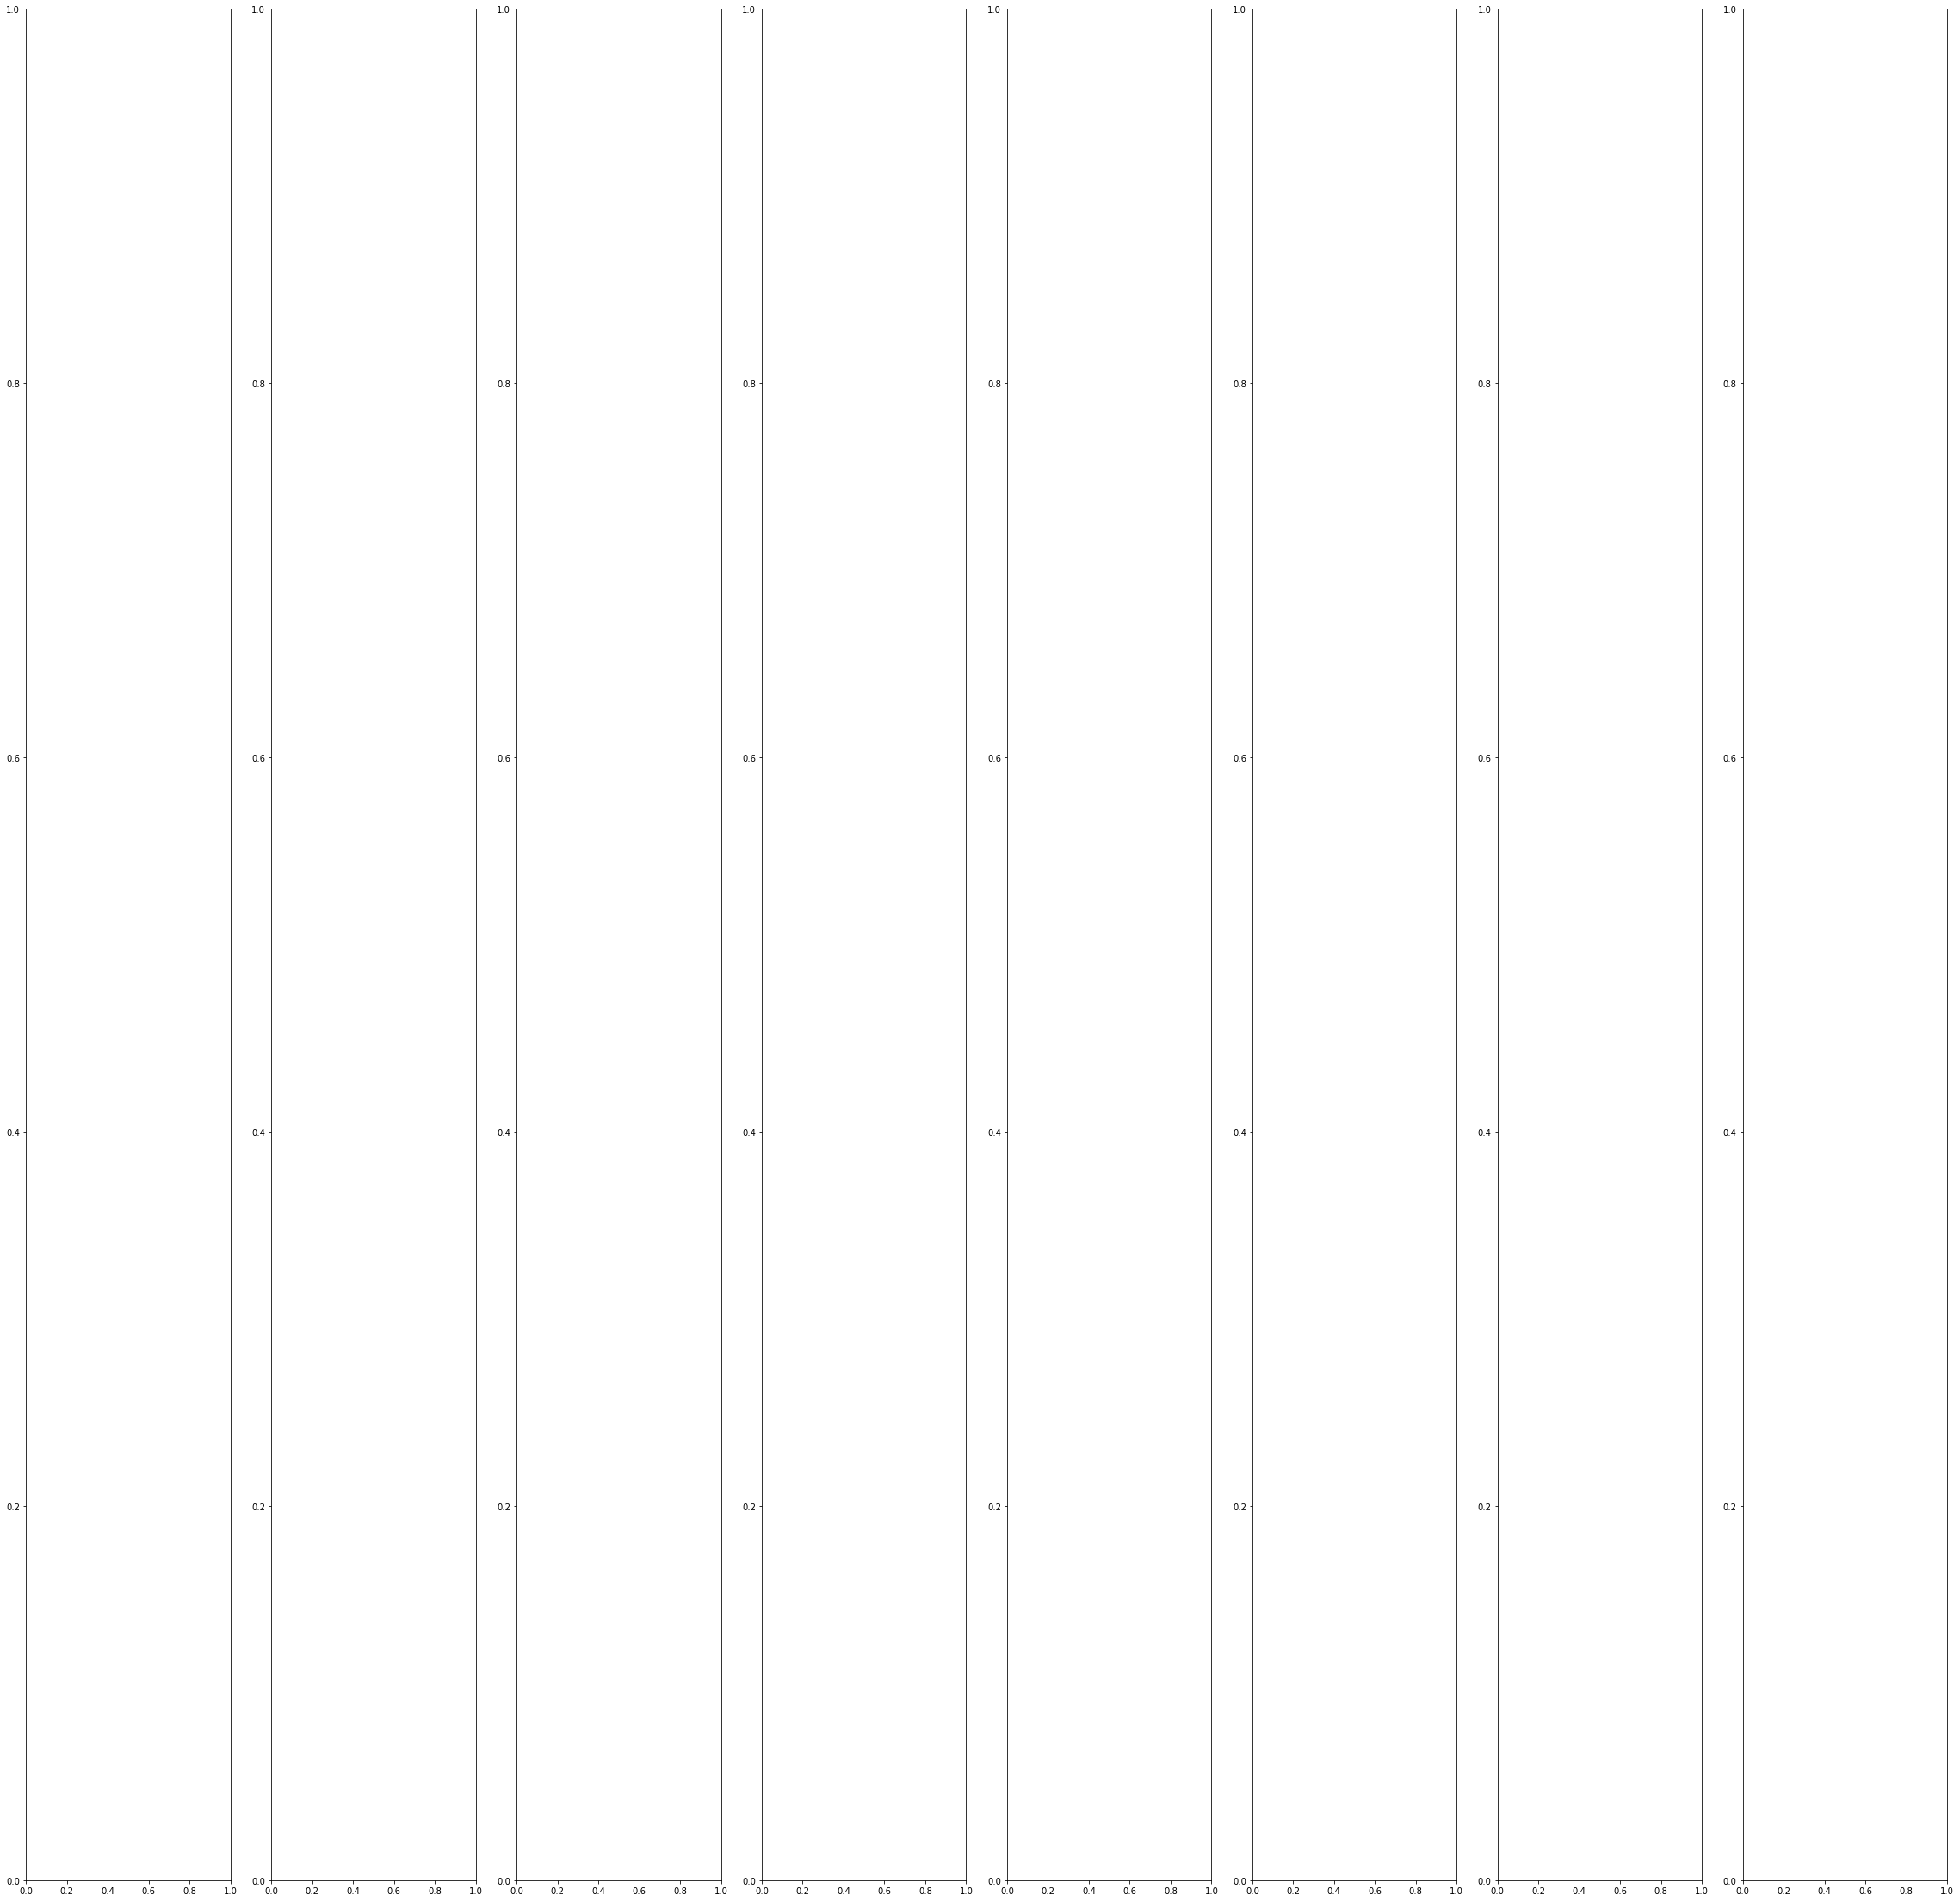

In [2]:
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

def draw(data, x, y, ax):
    seaborn.heatmap(data, 
                    xticklabels=x, square=True, yticklabels=y, vmin=0.0, vmax=1.0, 
                    cbar=False, ax=ax)

for layer in range(1, 6, 2):
    fig, axs = plt.subplots(1, 8, figsize=(40, 40))
    print(f"Encoder Layer {layer + 1}")
    for h in range(8):
        draw(attn_wts[-1].get('Encoder')[layer][2][:len(ss), :len(ss)], ss, ss if h == 0 else [], ax=axs[h])
    plt.show()

Decoder Self Attention Layer 2


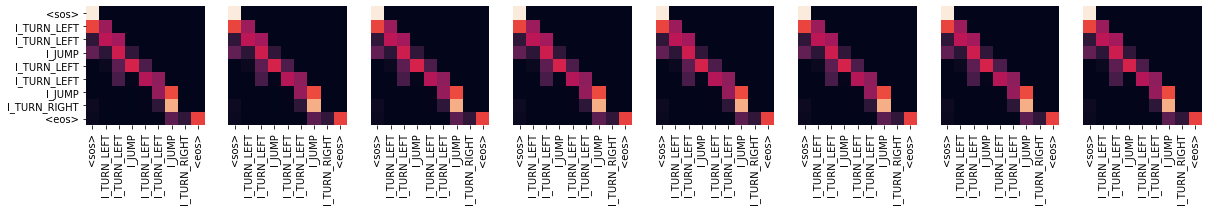

Decoder Self Attention Layer 4


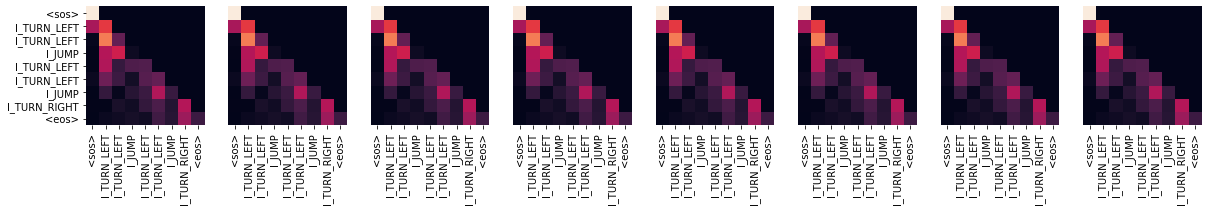

Decoder Self Attention Layer 6


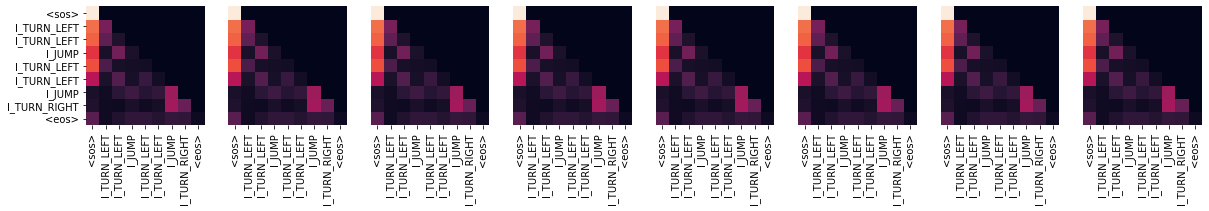

In [12]:
for layer in range(1, 6, 2):
    fig, axs = plt.subplots(1, 8, figsize=(40, 40))
    print(f"Decoder Self Attention Layer {layer + 1}")
    for h in range(8):
        draw(attn_wts[-1].get('Decoder')[layer].get('Sublayer1')[2][:len(tt), :len(tt)], 
             tt, tt if h == 0 else [], ax=axs[h])
    plt.show()

torch.Size([33, 11])
Decoder MHA Layer 2


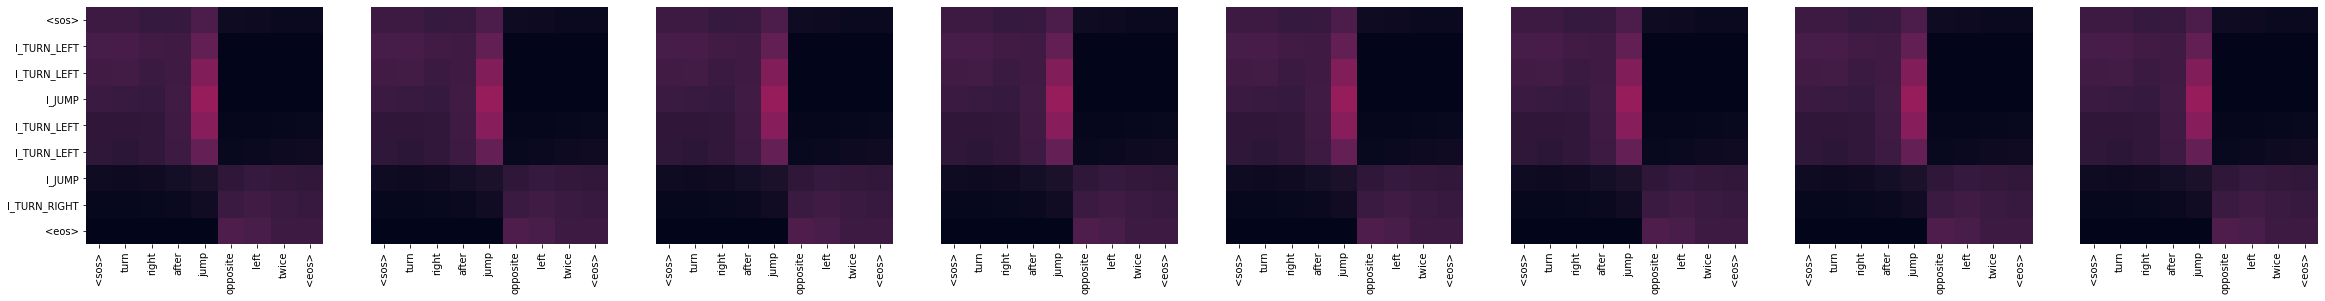

Decoder MHA Layer 4


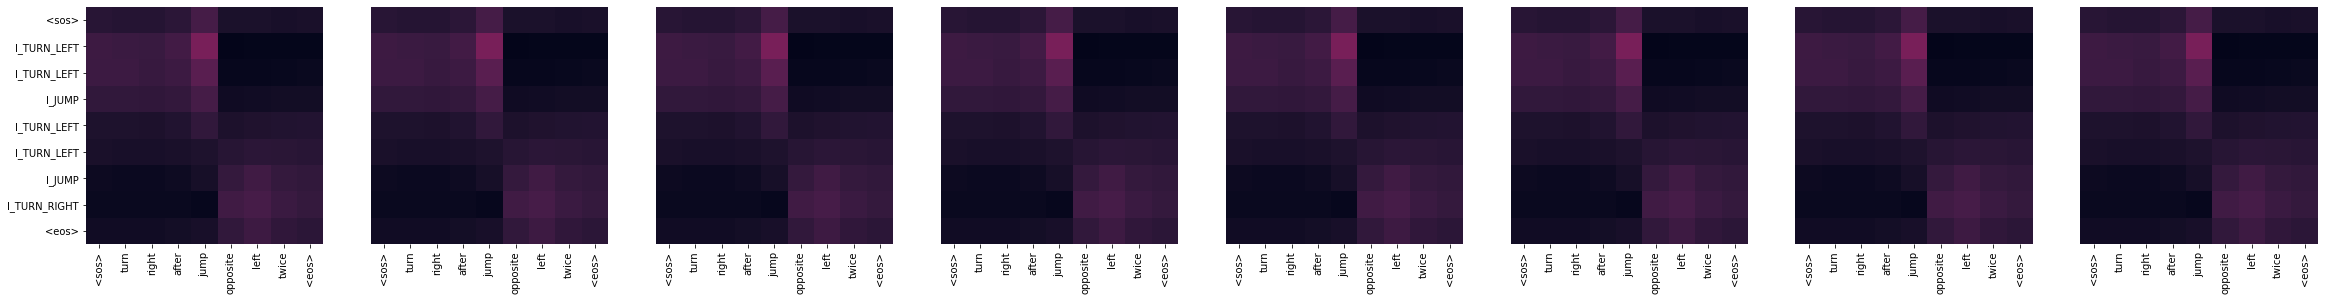

Decoder MHA Layer 6


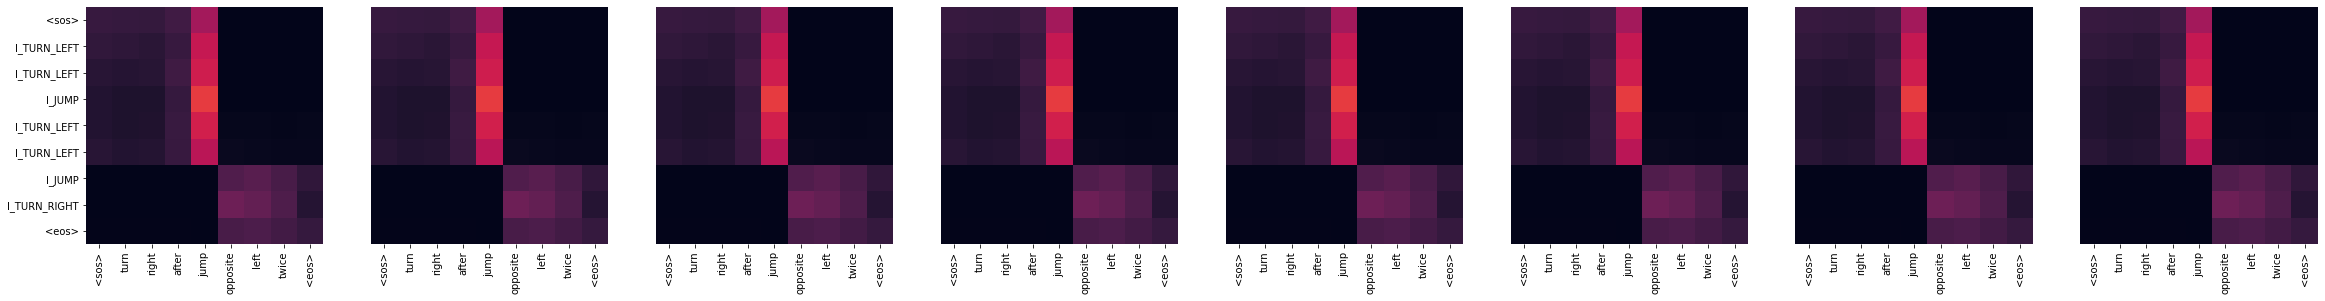

In [23]:
for layer in range(1, 6, 2):
    fig, axs = plt.subplots(1, 8, figsize=(40, 40))
    print(f"Decoder MHA Layer {layer + 1}")
    for h in range(8):
        draw(attn_wts[-1].get('Decoder')[layer].get('Sublayer2')[2][:len(tt), :len(ss)],
             ss, tt if h == 0 else [], ax=axs[h])
    plt.show()

In [7]:
import torch
from models.models import LanguageParser
model = LanguageParser(
    src_vocab_size=17,
    trg_vocab_size=10,
    d_model=400,
    nhead=8,
    num_decoder_layers=6,
    dim_feedforward=2048,
    dropout=0.3,
    pad_idx=1,
    device=torch.device('cpu')
)
device = torch.device('cpu')
model.load_state_dict(torch.load('../weights/language_parser/scan/defaults_addjump.pt', map_location=device))
model.device = 'cpu'
model = model.to(device)

In [8]:
preds = []
attn_wts = []
model.eval()
with torch.no_grad():
    for batch in test_data:
        trg_input = batch.trg[:-1, :]
        out, attn_wt = model(batch.src, trg_input)
        pred = torch.argmax(out, axis=2)
        preds.append(pred.transpose(0, 1)[2])
        attn_wts.append(attn_wt)

Decoder Self Attention Layer 1


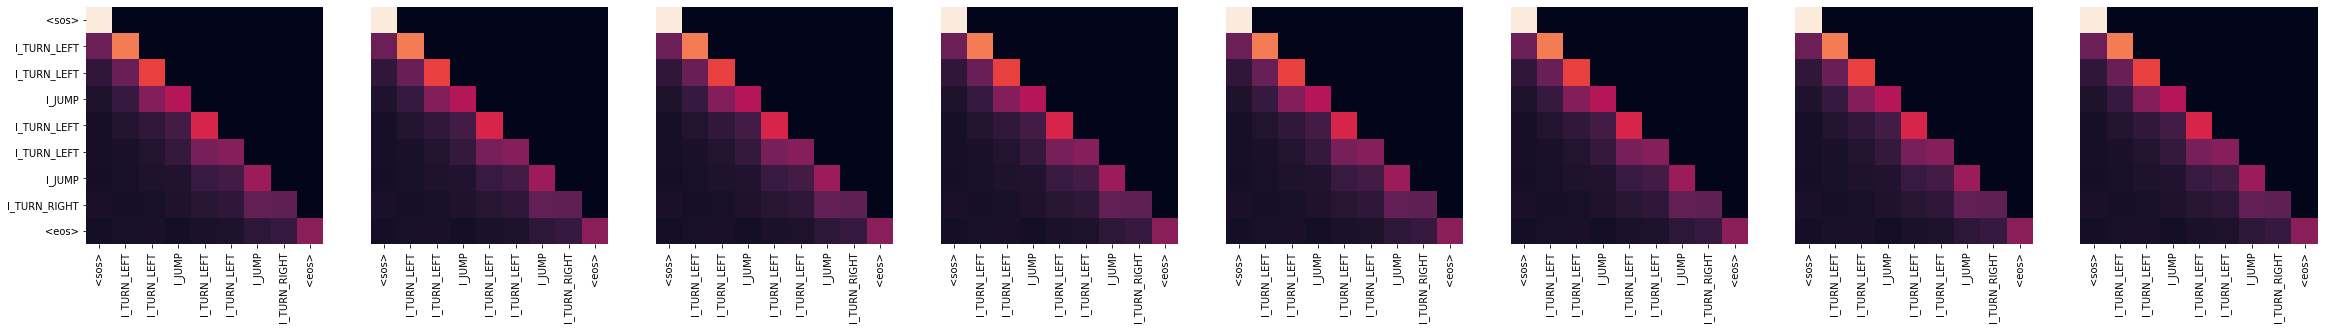

Decoder Self Attention Layer 2


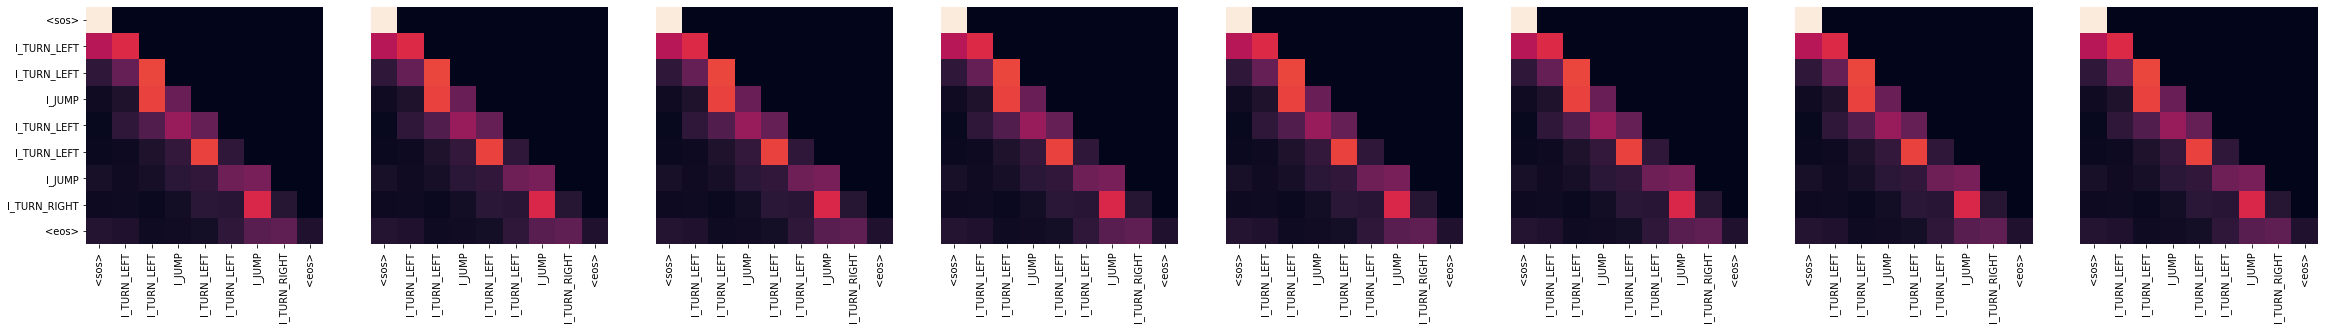

In [27]:
for layer in range(0, 2, 1):
    fig, axs = plt.subplots(1, 8, figsize=(40, 40))
    print(f"Decoder Self Attention Layer {layer + 1}")
    for h in range(8):
        draw(attn_wts[-1].get('Decoder')[layer].get('Sublayer1')[2][:len(tt), :len(tt)], 
             tt, tt if h == 0 else [], ax=axs[h])
    plt.show()

Decoder MHA Layer 1


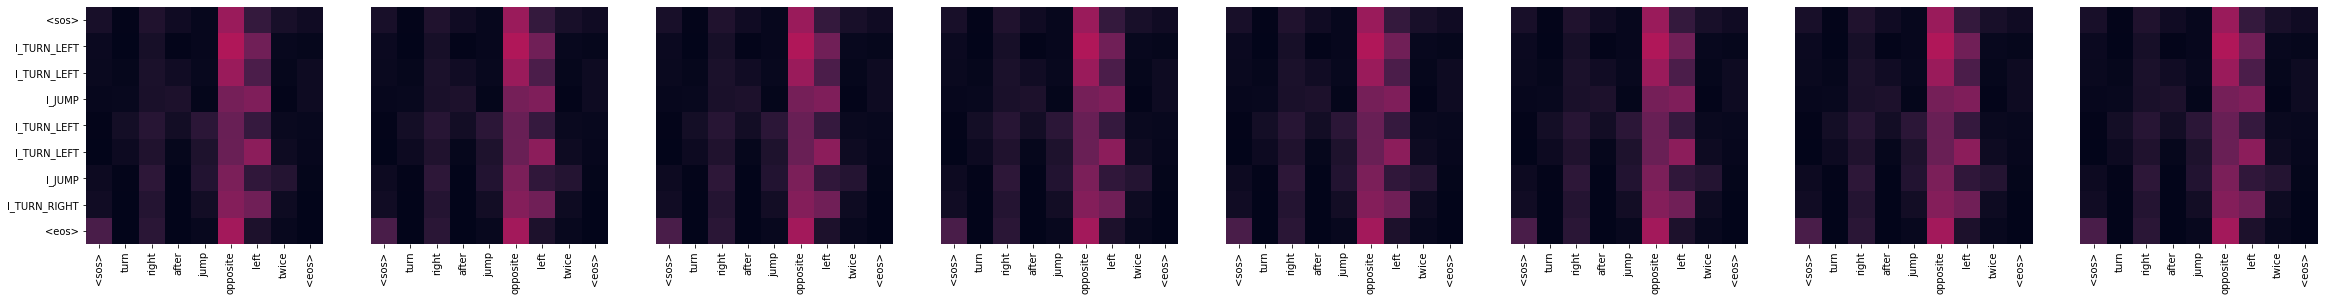

Decoder MHA Layer 2


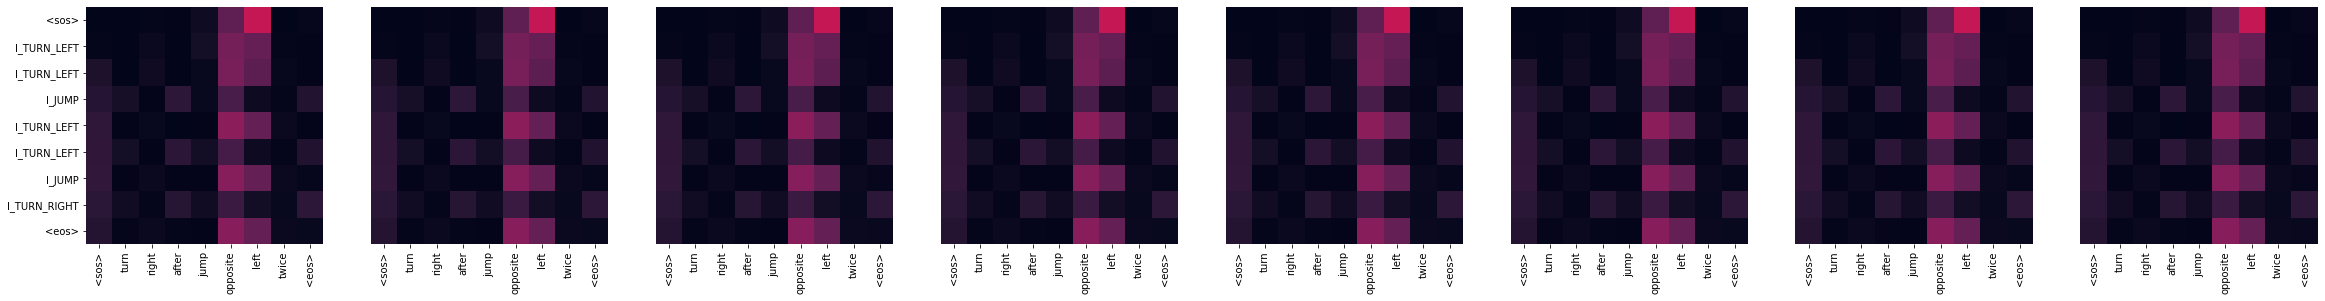

In [29]:
for layer in range(0, 2, 1):
    fig, axs = plt.subplots(1, 8, figsize=(40, 40))
    print(f"Decoder MHA Layer {layer + 1}")
    for h in range(8):
        draw(attn_wts[-1].get('Decoder')[layer].get('Sublayer2')[2][:len(tt), :len(ss)],
             ss, tt if h == 0 else [], ax=axs[h])
    plt.show()